# <span style="color: #4CAF50; font-family: 'Arial, sans-serif';">INDIA START-UP FUNDING ANALYSIS (2018 to 2021) - </span>


# INTRODUCTION
 The focus of this analysis is on the startup environment in India. This means examining various aspects of startups, including their growth, funding, and other trends. This analysis will cover a period of four years, from 2018 to 2021, which allows for a comprehensive exploration of trends and changes within the startup ecosystem.  The analysis will follow the CRISP-DM (Cross-Industry Standard Process for Data Mining) framework consisting of six phases: Business Understanding, Data Understanding, Data Preparation, Modeling, Evaluation, and Deployment. 

# Business Understanding:
1. Identify Key Trends:  
Objective: Uncover and understand the key trends in the Indian startup ecosystem over the four-year period (2018-2021).  
Goals: Identify sectors experiencing the most significant growth, the distribution of funding across rounds, and the geographic distribution of startup activities.
2. Evaluate Funding Patterns:  
Objective: Analyze funding patterns to understand how different sectors, rounds, and company activities attract investment.  
Goals: Identify sectors receiving the highest and lowest funding, explore the distribution of funding amounts, and understand the most common types of company activities that attract investment.
3. Assess Investor Involvement:  
Objective: Understand the role and impact of investors in the Indian startup ecosystem.  
Goals: Identify the most active investors, assess their investment patterns, and understand the correlation between investor involvement and 
startup success.

# Project Goals:
1. Clean and Prepare Data:  
Objective: Ensure the dataset is cleaned and prepared for analysis.  
Goals: Handle missing values, standardize data types, and address any inconsistencies or outliers.  
2. Perform Exploratory Data Analysis (EDA)  
Objective: Gain insights through exploratory analysis.  
Goals: Visualize trends over time, explore distributions of funding amounts, and identify notable patterns in the data.  
3. Communicate Findings:  
Objective: Effectively communicate insights and findings.  
Goals: Create clear and concise visualizations, reports, and presentations to convey key findings to stakeholders.
4. Provide Recommendations:  
Objective: Offer actionable recommendations based on the analysis.  
Goals: Suggest strategies for startups, investors, and policymakers based on identified trends and opportunities.

# HYPOTHESIS TESTING 
1. Null Hypothesis (HO) - The amount of funding for companies is not influenced by the company's industry.
2. Alternate Hypothesis (H1) - The amount of funding for companies is influenced by the company's industry.

# Business Questions
1. How does the distribution of funding amounts vary across different industries?
2. Are certain industries more consistent in funding amounts, indicating stability or predictability?
3. Can we identify specific industries that tend to attract higher funding amounts?
4. Are there outliers in the funding amounts within certain industries?
5. Does the location influence the funding in certain industries

--

# PROJECT WORK

In [75]:
# Importing the necessary libraries
import pyodbc     
#import the dotenv_values function from the dotenv package
from dotenv import dotenv_values    
import pandas as pd
from pandas_summary import DataFrameSummary
import warnings 
import re
import numpy as np

warnings.filterwarnings('ignore')

In [76]:
import re

In [77]:
from forex_python.converter import CurrencyRates

In [78]:
import matplotlib.pyplot as plt
import seaborn as sns

In [79]:
# Load environment variables from .env file into a dictionary
environment_variables = dotenv_values('.env')

# Get the values for the credentials you set in the '.env' file
server = environment_variables.get("server")
database = environment_variables.get("database")
username = environment_variables.get("username")
password = environment_variables.get("password")

In [80]:
connection_string = f"DRIVER={{SQL Server}};SERVER={server};DATABASE={database};UID={username};PWD={password};MARS_Connection=yes;MinProtocolVersion=TLSv1.2;"

In [81]:
# Use the connect method of the pyodbc library and pass in the connection string.

connection = pyodbc.connect(connection_string)

In [82]:
# importing the data sets to the environment. The first two are SQL queries to pull the 2020 & 2021 data from the server
# The data3 & 4 are downloaded data sets thus importing them using pandas read_csv() for the 2018 & 2019 data sets

query1 = "SELECT * FROM dbo.LP1_startup_funding2021"
data1 = pd.read_sql(query1, connection)
query2 = "SELECT * FROM dbo.LP1_startup_funding2020"
data2 = pd.read_sql(query2, connection)

In [83]:
data1.to_csv('startup_funding2021.csv', index =False)
data2.to_csv('startup_funding2021.csv', index =False)

In [84]:
df_2018 = pd.read_csv('startup_funding2018.csv')
df_2019 = pd.read_csv('startup_funding2019.csv')
df_2020 = pd.read_csv('startup_funding2020.csv')
df_2021 = pd.read_csv('startup_funding2021.csv')

### Checking Data sets loaded on to notebook

In [85]:
df_2018.head(2)

,Company Name,Industry,Round/Series,Amount,Location,About Company
0,TheCollegeFever,"Brand Marketing, Event Promotion, Marketing, S...",Seed,250000,"Bangalore, Karnataka, India","TheCollegeFever is a hub for fun, fiesta and f..."
1,Happy Cow Dairy,"Agriculture, Farming",Seed,"₹40,000,000","Mumbai, Maharashtra, India",A startup which aggregates milk from dairy far...


In [86]:
df_2018.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 526 entries, 0 to 525
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Company Name   526 non-null    object
 1   Industry       526 non-null    object
 2   Round/Series   526 non-null    object
 3   Amount         526 non-null    object
 4   Location       526 non-null    object
 5   About Company  526 non-null    object
dtypes: object(6)
memory usage: 24.8+ KB


The data frame from 2018 has the following attributes
1. All the 6 columns don't have any null values, and thus the data entries will need to be checked for consistency
2. There are 526 rows in the data frame
3. the amount column is in object format and needs to be cleaned into a numeric format
4. the column names should also be cleaned to become lower case and easy to read

In [87]:
# Renaming the columns and puting them in lowercase
new_column_names = {'Company Name': 'company_name', 'Industry': 'industry', 'Round/Series' : 'series',
                    'Amount': 'amount', 'Location': 'location', 'About Company': 'about'}
df_2018 = df_2018.rename(columns=new_column_names)

In [88]:
df_2018.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 526 entries, 0 to 525
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   company_name  526 non-null    object
 1   industry      526 non-null    object
 2   series        526 non-null    object
 3   amount        526 non-null    object
 4   location      526 non-null    object
 5   about         526 non-null    object
dtypes: object(6)
memory usage: 24.8+ KB


In [89]:
# Checking for duplicates in the 2018 data
df_2018.duplicated().sum()

1

In [90]:
# droping the duplicates
df_2018.drop_duplicates(keep='first', inplace=True)

In [91]:
# Checking id the rows are down to 525 from 526
df_2018.info()

<class 'pandas.core.frame.DataFrame'>
Index: 525 entries, 0 to 525
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   company_name  525 non-null    object
 1   industry      525 non-null    object
 2   series        525 non-null    object
 3   amount        525 non-null    object
 4   location      525 non-null    object
 5   about         525 non-null    object
dtypes: object(6)
memory usage: 28.7+ KB


## Cleaning 2018 data column by column

In [92]:
# Cleaning company_name column
print(f"Number of unique companies in 'company_name' column: {df_2018['company_name'].nunique()}")

Number of unique companies in 'company_name' column: 525


##### Observation:
1.The comany name column appears to be clean as is as there are no duplicated company names with 525 unique companies

In [93]:
# Checking the Industry column
print(f"Number of unique companies in 'industry' column: {df_2018['industry'].nunique()}")

Number of unique companies in 'industry' column: 405


In [94]:
df_2018['industry'].value_counts()

industry
—                                                                                 30
Financial Services                                                                15
Education                                                                          8
Information Technology                                                             7
Finance, Financial Services                                                        5
                                                                                  ..
Business Intelligence, Customer Service, Market Research, SaaS                     1
Digital Media, Internet, Media and Entertainment, Online Portals, Social Media     1
Consumer Lending, Financial Services, Lending, Personal Finance                    1
Education, Information Technology, Internet, Mobile, Software                      1
Biotechnology, Health Care, Pharmaceutical                                         1
Name: count, Length: 405, dtype: int64

In [95]:
# To clean the industry column by removing the multiple entries and remaining with a common entry
industry_lists = df_2018['industry'].str.split(', ').explode()
# Get the most common industry for each original entry
most_common_industry = industry_lists.groupby(level=0).agg(lambda x: x.mode().iloc[0])
# Replace the 'industry' column with the most common industry for each entry
df_2018['industry'] = most_common_industry
# Check the result
print(f"Number of unique companies in cleaned 'industry' column: {df_2018['industry'].nunique()}")

Number of unique companies in cleaned 'industry' column: 147


In [96]:
# To remove the - in the industry column and covert to null
df_2018['industry'] = df_2018['industry'].replace('-', np.nan)

In [97]:
# To clean the series column 
# First checking for unique values
print(f"Unique values in the 'series' column:\n{df_2018['series'].nunique()}")

Unique values in the 'series' column:
21


In [98]:
df_2018['series'].unique()

array(['Seed', 'Series A', 'Angel', 'Series B', 'Pre-Seed',
       'Private Equity', 'Venture - Series Unknown', 'Grant',
       'Debt Financing', 'Post-IPO Debt', 'Series H', 'Series C',
       'Series E', 'Corporate Round', 'Undisclosed',
       'https://docs.google.com/spreadsheets/d/1x9ziNeaz6auNChIHnMI8U6kS7knTr3byy_YBGfQaoUA/edit#gid=1861303593',
       'Series D', 'Secondary Market', 'Post-IPO Equity',
       'Non-equity Assistance', 'Funding Round'], dtype=object)

In the unique values, there appears to be a url link that need to be removed and replaced with the most common Venture - Series Unknown

In [99]:
# Define the value to replace the URL link
replacement_value = 'Venture - Series Unknown'
# Replace the URL link with the defined replacement value
df_2018['series'] = np.where(
    df_2018['series'].str.contains('http'),  # Check if the value contains 'http'
    replacement_value,
    df_2018['series']  # Keep the original value if it doesn't contain 'http'
)

In [100]:
# To check if the link has been dropped
df_2018['series'].unique()

array(['Seed', 'Series A', 'Angel', 'Series B', 'Pre-Seed',
       'Private Equity', 'Venture - Series Unknown', 'Grant',
       'Debt Financing', 'Post-IPO Debt', 'Series H', 'Series C',
       'Series E', 'Corporate Round', 'Undisclosed', 'Series D',
       'Secondary Market', 'Post-IPO Equity', 'Non-equity Assistance',
       'Funding Round'], dtype=object)

In [101]:
# To clean the amount column
# First check the unique entries
df_2018['amount'].unique()

array(['250000', '₹40,000,000', '₹65,000,000', '2000000', '—', '1600000',
       '₹16,000,000', '₹50,000,000', '₹100,000,000', '150000', '1100000',
       '₹500,000', '6000000', '650000', '₹35,000,000', '₹64,000,000',
       '₹20,000,000', '1000000', '5000000', '4000000', '₹30,000,000',
       '2800000', '1700000', '1300000', '₹5,000,000', '₹12,500,000',
       '₹15,000,000', '500000', '₹104,000,000', '₹45,000,000', '13400000',
       '₹25,000,000', '₹26,400,000', '₹8,000,000', '₹60,000', '9000000',
       '100000', '20000', '120000', '₹34,000,000', '₹342,000,000',
       '$143,145', '₹600,000,000', '$742,000,000', '₹1,000,000,000',
       '₹2,000,000,000', '$3,980,000', '$10,000', '₹100,000',
       '₹250,000,000', '$1,000,000,000', '$7,000,000', '$35,000,000',
       '₹550,000,000', '$28,500,000', '$2,000,000', '₹240,000,000',
       '₹120,000,000', '$2,400,000', '$30,000,000', '₹2,500,000,000',
       '$23,000,000', '$150,000', '$11,000,000', '₹44,000,000',
       '$3,240,000', '₹60

Key observations:
1. Funding amounts are in Indian Rupees (₹), US Dollars ($), and potentially other currencies.
2. Numeric values are present in both integer and float formats.
3. Some entries include special characters like '—'.
4. A few entries seem to contain URL links or non-numeric data.
5. The data in this array may require cleaning and standardization to facilitate meaningful analysis of funding trends.

In [102]:
# Step 1: Manual conversion of Indian Rupees to USD with exchange rate 0.0146
conversion_rate_inr_to_usd = 0.0146

# Step 1: Convert entries with '₹' to dollars first, then to numeric
df_2018['amount'] = df_2018['amount'].apply(lambda x: float(x.replace('₹', '').replace(',', '')) * conversion_rate_inr_to_usd if isinstance(x, str) and '₹' in x else x)

# Step 2: Remove '$' from entries with a dollar sign and convert to numeric
df_2018['amount'] = df_2018['amount'].apply(lambda x: float(x.replace('$', '').replace(',', '')) if isinstance(x, str) and '$' in x else x)

# Step 3: Convert entries with no currency sign to numeric
df_2018['amount'] = pd.to_numeric(df_2018['amount'], errors='coerce')

# Step 4: Convert entries of "-" only to NaN
df_2018['amount'] = df_2018['amount'].replace('-', float('nan'))

# Display the updated DataFrame info
df_2018['amount'].head()

0     250000.0
1     584000.0
2     949000.0
3    2000000.0
4          NaN
Name: amount, dtype: float64

In [103]:
# Cleaning the location column
# Checking for unique values
df_2018['location'].unique()

array(['Bangalore, Karnataka, India', 'Mumbai, Maharashtra, India',
       'Gurgaon, Haryana, India', 'Noida, Uttar Pradesh, India',
       'Hyderabad, Andhra Pradesh, India', 'Bengaluru, Karnataka, India',
       'Kalkaji, Delhi, India', 'Delhi, Delhi, India', 'India, Asia',
       'Hubli, Karnataka, India', 'New Delhi, Delhi, India',
       'Chennai, Tamil Nadu, India', 'Mohali, Punjab, India',
       'Kolkata, West Bengal, India', 'Pune, Maharashtra, India',
       'Jodhpur, Rajasthan, India', 'Kanpur, Uttar Pradesh, India',
       'Ahmedabad, Gujarat, India', 'Azadpur, Delhi, India',
       'Haryana, Haryana, India', 'Cochin, Kerala, India',
       'Faridabad, Haryana, India', 'Jaipur, Rajasthan, India',
       'Kota, Rajasthan, India', 'Anand, Gujarat, India',
       'Bangalore City, Karnataka, India', 'Belgaum, Karnataka, India',
       'Thane, Maharashtra, India', 'Margão, Goa, India',
       'Indore, Madhya Pradesh, India', 'Alwar, Rajasthan, India',
       'Kannur, Kerala, Ind

1. The 'location' column in the df_2018 DataFrame includes entries representing various cities and regions in India. Each entry follows a structure of City, State, Country. 
2. However, there are instances where the location entries are not consistent, with variations in city names and formatting.
3. For better analysis, it is important to split this column ito the three categories, City, State, Country

In [104]:
# Create new columns for city, state, and country
df_2018[['city', 'state', 'country']] = df_2018['location'].str.split(', ', expand=True)

In [105]:
# clean the about
# Check for unique values
print(f"Unique values in the 'series' column is: {df_2018['about'].nunique()}")

Unique values in the 'series' column is: 524


The about column will be left as is since the values are 524 unique values all object formats

In [106]:
# Checking data info for final cleaning
df_2018.info()

<class 'pandas.core.frame.DataFrame'>
Index: 525 entries, 0 to 525
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   company_name  525 non-null    object 
 1   industry      525 non-null    object 
 2   series        525 non-null    object 
 3   amount        377 non-null    float64
 4   location      525 non-null    object 
 5   about         525 non-null    object 
 6   city          525 non-null    object 
 7   state         525 non-null    object 
 8   country       521 non-null    object 
dtypes: float64(1), object(8)
memory usage: 41.0+ KB


In [107]:
# Create final dataframe for 2018 data 
# 1. Drop 'amount', 'country', and 'location' columns
df_2018.drop(['country', 'location'], axis=1, inplace=True)
# 3. Add a separate column 'data_year' with 2018 as the only entry in datetime format
df_2018['data_year'] = pd.to_datetime('2018', format='%Y')
# Display the updated DataFrame info
df_2018.info()

<class 'pandas.core.frame.DataFrame'>
Index: 525 entries, 0 to 525
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   company_name  525 non-null    object        
 1   industry      525 non-null    object        
 2   series        525 non-null    object        
 3   amount        377 non-null    float64       
 4   about         525 non-null    object        
 5   city          525 non-null    object        
 6   state         525 non-null    object        
 7   data_year     525 non-null    datetime64[ns]
dtypes: datetime64[ns](1), float64(1), object(6)
memory usage: 36.9+ KB


In [108]:
# displaying clean 2018 datframe
df_2018.head(5)

,company_name,industry,series,amount,about,city,state,data_year
0,TheCollegeFever,Brand Marketing,Seed,250000.0,"TheCollegeFever is a hub for fun, fiesta and f...",Bangalore,Karnataka,2018-01-01
1,Happy Cow Dairy,Agriculture,Seed,584000.0,A startup which aggregates milk from dairy far...,Mumbai,Maharashtra,2018-01-01
2,MyLoanCare,Credit,Series A,949000.0,Leading Online Loans Marketplace in India,Gurgaon,Haryana,2018-01-01
3,PayMe India,FinTech,Angel,2000000.0,PayMe India is an innovative FinTech organizat...,Noida,Uttar Pradesh,2018-01-01
4,Eunimart,E-Commerce Platforms,Seed,NaN,Eunimart is a one stop solution for merchants ...,Hyderabad,Andhra Pradesh,2018-01-01


## Performing EDA on clean 2018 dataframe

In [109]:
# 1. Summary Statistics
summary_stats = df_2018.describe(include="all")
summary_stats

,company_name,industry,series,amount,about,city,state,data_year
count,525,525,525,3.770000e+02,525,525,525,525
unique,525,147,20,NaN,524,50,18,NaN
top,TheCollegeFever,—,Seed,NaN,Algorithmic trading platform.,Bangalore,Karnataka,NaN
freq,1,30,279,NaN,2,101,166,NaN
mean,NaN,NaN,NaN,1.761677e+07,NaN,NaN,NaN,2018-01-01 00:00:00
min,NaN,NaN,NaN,8.760000e+02,NaN,NaN,NaN,2018-01-01 00:00:00
25%,NaN,NaN,NaN,5.000000e+05,NaN,NaN,NaN,2018-01-01 00:00:00
50%,NaN,NaN,NaN,1.300000e+06,NaN,NaN,NaN,2018-01-01 00:00:00
75%,NaN,NaN,NaN,5.000000e+06,NaN,NaN,NaN,2018-01-01 00:00:00
max,NaN,NaN,NaN,1.000000e+09,NaN,NaN,NaN,2018-01-01 00:00:00


Observations:
1. company_name:
All entries in the company_name column are unique, indicating no repetition.The top entry is "TheCollegeFever."
2. industry: The industry column has 30 occurrences of a missing or unspecified value represented by "—."The top industry is "Financial Services," appearing 30 times.
3. series: The most frequent funding series is "Seed," occurring 279 times. There are 20 unique funding series in the dataset.
4. amount: There are 377 non-null entries in the amount column.Funding amounts range from 876 to 1,000,000,000. The mean funding amount is approximately 17,616,770, while the standard deviation is 77,972,610.
5. about: There are 525 unique entries in the about column.The most frequent description is "Algorithmic trading platform," appearing twice.
6. city: There are 101 occurrences of "Bangalore" in the city column, making it the most frequent city. There are 50 unique cities in the dataset.
7. state: The most frequent state is "Karnataka," appearing 166 times.There are 18 unique states in the dataset.

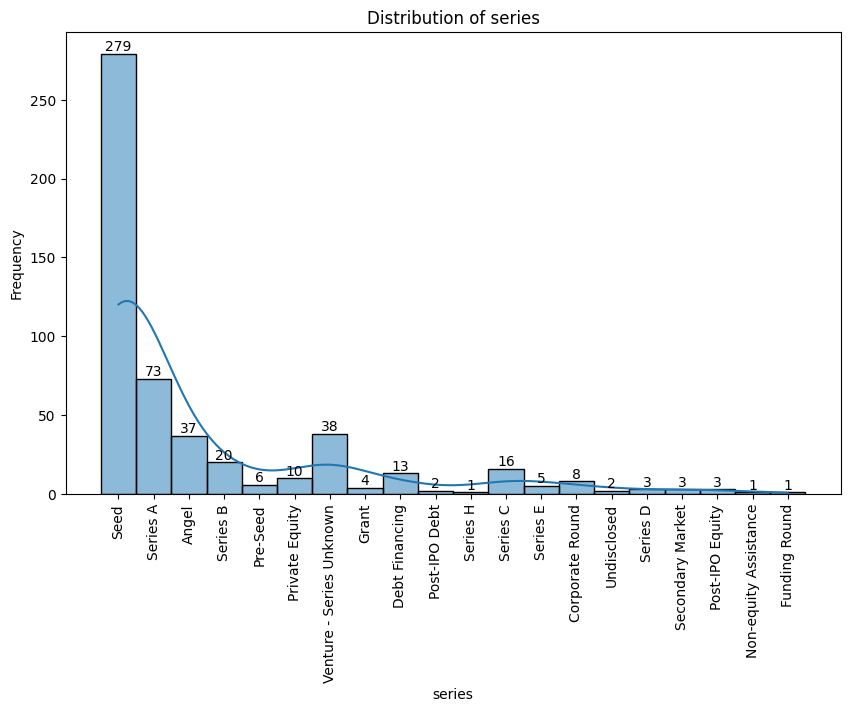

In [110]:
# 2. Distribution of series (Histogram)
plt.figure(figsize=(10, 6))
ax = sns.histplot(df_2018['series'], bins=10, kde=True)
# Add data labels
for rect in ax.patches:
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width() / 2, height, f'{int(height)}', ha='center', va='bottom')
plt.title('Distribution of series')
plt.xlabel('series')
plt.ylabel('Frequency')
plt.xticks(rotation=90)
plt.show()

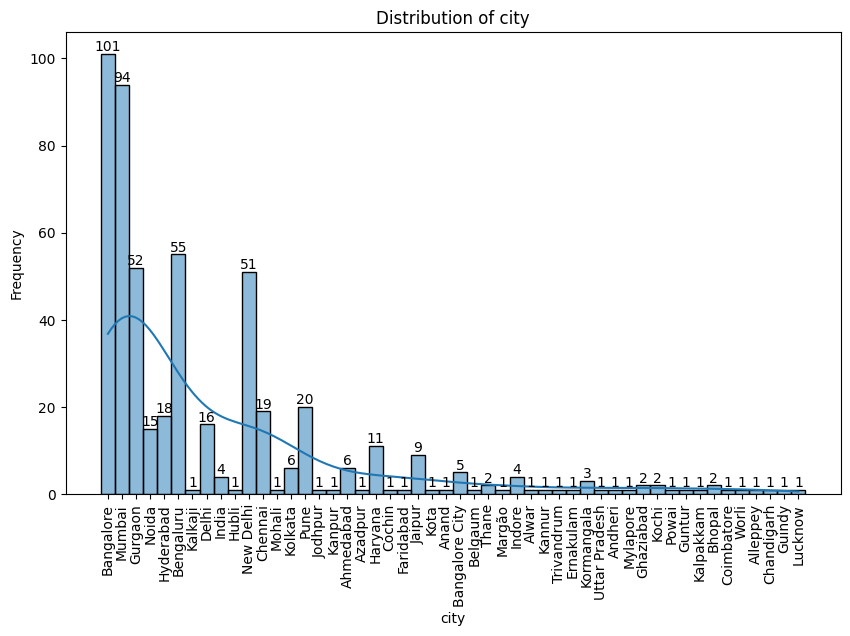

In [111]:
# 2. Distribution of city (Histogram)
plt.figure(figsize=(10, 6))
ax = sns.histplot(df_2018['city'], bins=10, kde=True)
# Add data labels
for rect in ax.patches:
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width() / 2, height, f'{int(height)}', ha='center', va='bottom')
plt.title('Distribution of city')
plt.xlabel('city')
plt.ylabel('Frequency')
plt.xticks(rotation=90)
plt.show()

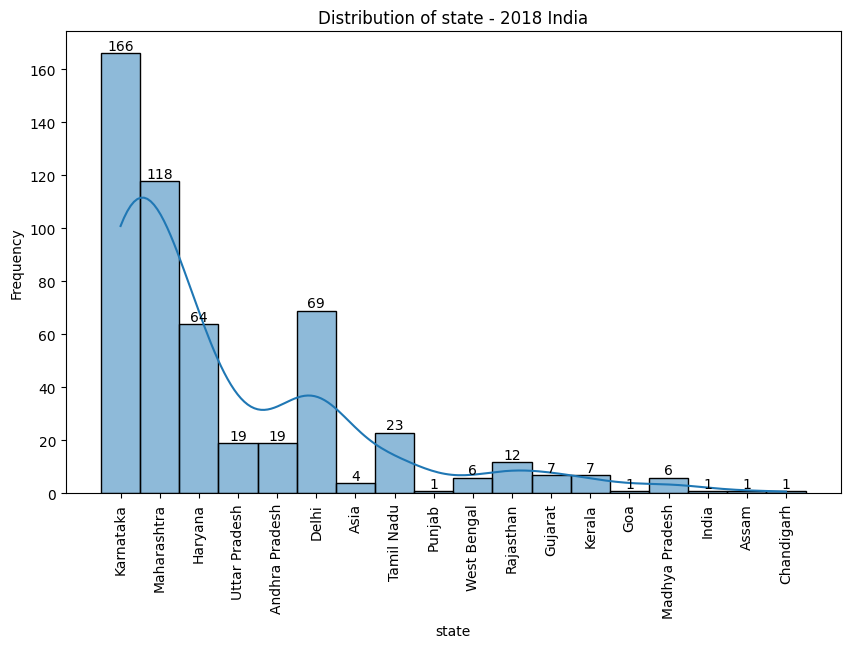

In [112]:
# 2. Distribution of state (Histogram)
plt.figure(figsize=(10, 6))
ax = sns.histplot(df_2018['state'], bins=10, kde=True)
# Add data labels
for rect in ax.patches:
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width() / 2, height, f'{int(height)}', ha='center', va='bottom')
plt.title('Distribution of state - 2018 India')
plt.xlabel('state')
plt.ylabel('Frequency')
plt.xticks(rotation=90)
plt.show()

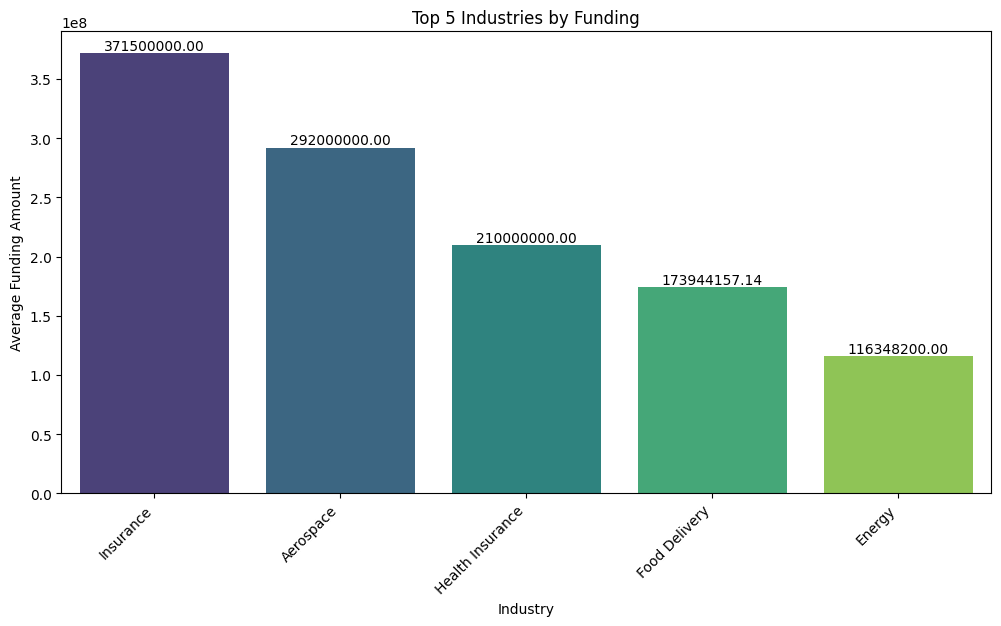

In [113]:
# Top 5 industries
top_industries = df_2018.groupby('industry')['amount'].mean().sort_values(ascending=False).head(5)
plt.figure(figsize=(12, 6))
bar_plot = sns.barplot(x=top_industries.index, y=top_industries.values, palette="viridis")
# Adding data labels
for index, value in enumerate(top_industries):
    bar_plot.text(index, value + 0.1, f'{value:.2f}', ha='center', va='bottom')
plt.title('Top 5 Industries by Funding')
plt.xlabel('Industry')
plt.ylabel('Average Funding Amount')
plt.xticks(rotation=45, ha='right')
plt.show()

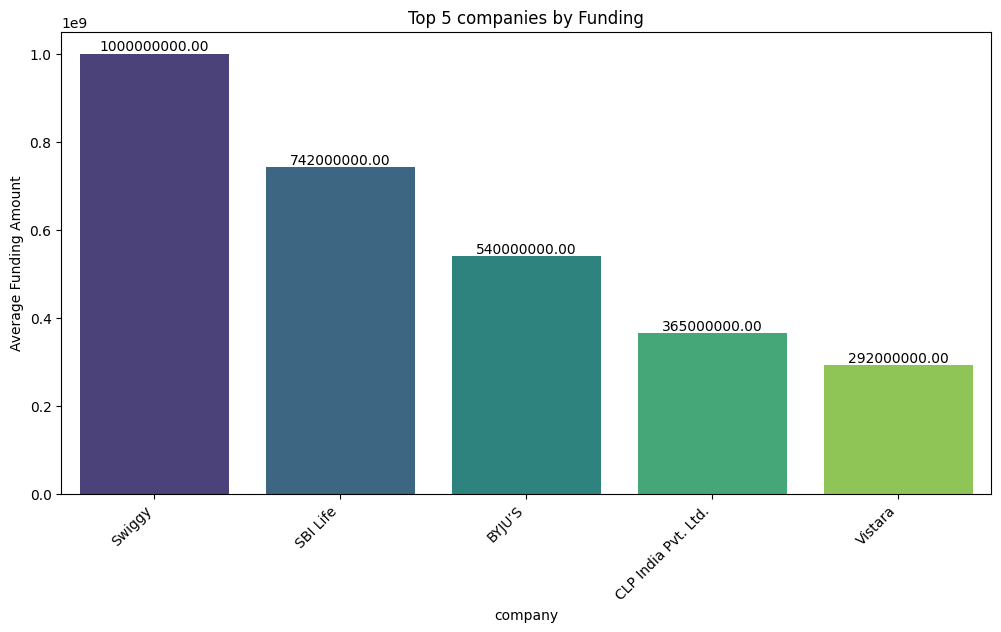

In [114]:
# Top 5 companies
top_companies = df_2018.groupby('company_name')['amount'].mean().sort_values(ascending=False).head(5)
plt.figure(figsize=(12, 6))
bar_plot = sns.barplot(x=top_companies.index, y=top_companies.values, palette="viridis")
# Adding data labels
for index, value in enumerate(top_companies):
    bar_plot.text(index, value + 0.1, f'{value:.2f}', ha='center', va='bottom')
plt.title('Top 5 companies by Funding')
plt.xlabel('company')
plt.ylabel('Average Funding Amount')
plt.xticks(rotation=45, ha='right')
plt.show()

##### Summary 2018 Data
1. The series with the highest frequency was 'seed'
2. The Industry with the highest investment in 2018 was insurance
3. The city and state with the highest frequency was Bangalore and Karnataka in the 2018 data set
4. The company with the highest funding was swiggy in 2018 with 1billlion dolars

## Cleaning 2019 data column by column

In [115]:
df_2019.head()

,Company/Brand,Founded,HeadQuarter,Sector,What it does,Founders,Investor,Amount($),Stage
0,Bombay Shaving,NaN,NaN,Ecommerce,Provides a range of male grooming products,Shantanu Deshpande,Sixth Sense Ventures,"$6,300,000",NaN
1,Ruangguru,2014.0,Mumbai,Edtech,A learning platform that provides topic-based ...,"Adamas Belva Syah Devara, Iman Usman.",General Atlantic,"$150,000,000",Series C
2,Eduisfun,NaN,Mumbai,Edtech,It aims to make learning fun via games.,Jatin Solanki,"Deepak Parekh, Amitabh Bachchan, Piyush Pandey","$28,000,000",Fresh funding
3,HomeLane,2014.0,Chennai,Interior design,Provides interior designing solutions,"Srikanth Iyer, Rama Harinath","Evolvence India Fund (EIF), Pidilite Group, FJ...","$30,000,000",Series D
4,Nu Genes,2004.0,Telangana,AgriTech,"It is a seed company engaged in production, pr...",Narayana Reddy Punyala,Innovation in Food and Agriculture (IFA),"$6,000,000",NaN


In [116]:
# Checking 2019 india data_frame
df_2019.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 89 entries, 0 to 88
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Company/Brand  89 non-null     object 
 1   Founded        60 non-null     float64
 2   HeadQuarter    70 non-null     object 
 3   Sector         84 non-null     object 
 4   What it does   89 non-null     object 
 5   Founders       86 non-null     object 
 6   Investor       89 non-null     object 
 7   Amount($)      89 non-null     object 
 8   Stage          43 non-null     object 
dtypes: float64(1), object(8)
memory usage: 6.4+ KB


#### Data Overview
The dataset contains information on 89 companies/brands across various attributes. Here's a summary of the key details:
  1. Company/Brand: Name of the company or brand.
  2. Founded: Year of establishment (60 non-null entries).
  3. HeadQuarter: Location of the company's headquarters (70 non-null entries).
  4. Sector: Industry to which the company belongs (84 non-null entries).
  5. What it does: Description of the company's activities (89 non-null entries).
  6. Founders:Names of the founders (86 non-null entries).
  7. Investor:Information about investors (89 non-null entries).
  8. Amount($): Funding amount in dollars (89 non-null entries).
  9. Stage: the series of the funding (43 non-null entries).  
    
One column ('Founded') is of float64 data type.   
Eight columns are of object data type.  
There are missing values in columns such as 'Founded', 'HeadQuarter', 'Sector', 'Founders', and 'Stage'.


In [117]:
# Renaming the 2019 data set columns and putting them in lowercase
column_names_2019 = {'Company/Brand': 'company_name', 'Founded': 'founded', 'Sector': 'industry', 'Stage' : 'series',
                    'Amount($)': 'amount', 'HeadQuarter': 'location', 'What it does': 'about', 'Founders':'founders',
                    'Investor':'investor'}
df_2019 = df_2019.rename(columns=column_names_2019)
df_2019.head()

,company_name,founded,location,industry,about,founders,investor,amount,series
0,Bombay Shaving,NaN,NaN,Ecommerce,Provides a range of male grooming products,Shantanu Deshpande,Sixth Sense Ventures,"$6,300,000",NaN
1,Ruangguru,2014.0,Mumbai,Edtech,A learning platform that provides topic-based ...,"Adamas Belva Syah Devara, Iman Usman.",General Atlantic,"$150,000,000",Series C
2,Eduisfun,NaN,Mumbai,Edtech,It aims to make learning fun via games.,Jatin Solanki,"Deepak Parekh, Amitabh Bachchan, Piyush Pandey","$28,000,000",Fresh funding
3,HomeLane,2014.0,Chennai,Interior design,Provides interior designing solutions,"Srikanth Iyer, Rama Harinath","Evolvence India Fund (EIF), Pidilite Group, FJ...","$30,000,000",Series D
4,Nu Genes,2004.0,Telangana,AgriTech,"It is a seed company engaged in production, pr...",Narayana Reddy Punyala,Innovation in Food and Agriculture (IFA),"$6,000,000",NaN


In [118]:
# Checking for duplicated entries
print(f"there are : {df_2019.duplicated().sum()} duplicated values in the 2019 data frame")

there are : 0 duplicated values in the 2019 data frame


In [119]:
df_2019.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 89 entries, 0 to 88
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   company_name  89 non-null     object 
 1   founded       60 non-null     float64
 2   location      70 non-null     object 
 3   industry      84 non-null     object 
 4   about         89 non-null     object 
 5   founders      86 non-null     object 
 6   investor      89 non-null     object 
 7   amount        89 non-null     object 
 8   series        43 non-null     object 
dtypes: float64(1), object(8)
memory usage: 6.4+ KB


In [120]:
# Cleaning the company_name column
# Checking for unique values
print(f'There are : {df_2019['company_name'].nunique()} unique entries in the company_name column')

There are : 87 unique entries in the company_name column


In [121]:

df_2019['company_name'].value_counts()


company_name
Kratikal            2
Licious             2
Bombay Shaving      1
KredX               1
Euler Motors        1
                   ..
HungerBox           1
Fireflies .ai       1
Toffee Insurance    1
Seekify             1
Ess Kay Fincorp     1
Name: count, Length: 87, dtype: int64

The company_name column appears to be okay as is and does not require further cleaning

In [122]:
# Cleaning the founded column
# Checking The unique values, nunique value, and value counts in the founded column
unique_values = df_2019['founded'].nunique()
null_values = df_2019['founded'].isna().sum()
print(f'The unique values in the founded column are: {unique_values}, '
      f'while the null values are: {null_values}')

The unique values in the founded column are: 12, while the null values are: 29


Observation 
1. The null values in the founded column can be left and not droped
2. The column should be converted to datetiome from object since it hold dates companies were founded

In [123]:
# Converting the founded column to datetime
df_2019['founded'] = pd.to_datetime(df_2019['founded'], format='%Y', errors='coerce')

In [124]:
# Cleaning the location column
# Checking unique values and null values 
print(f' There are : {df_2019['location'].nunique()} unique values in the 2019 data frame location column,'
      f'and : {df_2019['location'].isna().sum()} null values')

 There are : 17 unique values in the 2019 data frame location column,and : 19 null values


Observation
1. The null values in the location will kept 
2. The location column will be renamed to city to conform with 2018 dataset

In [125]:
# renaming the location column to city
df_2019.rename(columns={'location': 'city'}, inplace=True)

In [126]:
# Cleaning the industry column
# Checking unique values and null values 
print(f' There are : {df_2019['industry'].nunique()} unique values in the 2019 data frame Industry column,'
      f'and {df_2019['industry'].isna().sum()} null values')

 There are : 52 unique values in the 2019 data frame Industry column,and 5 null values


In [127]:
# Checking the about/ founders, investor, and series columns 
print(f' There are : {df_2019['about'].nunique()} unique values in the 2019 data frame about column,'
      f'and {df_2019['about'].isna().sum()} null values\n'
      f' There are : {df_2019['founders'].nunique()} unique values in the 2019 data frame founders column,'
      f'and {df_2019['founders'].isna().sum()} null values\n'
      f' There are : {df_2019['investor'].nunique()} unique values in the 2019 data frame investor column,'
      f'and {df_2019['investor'].isna().sum()} null values\n'
      f' There are : {df_2019['series'].nunique()} unique values in the 2019 data frame series column,'
      f'and {df_2019['series'].isna().sum()} null values')

 There are : 88 unique values in the 2019 data frame about column,and 0 null values
 There are : 85 unique values in the 2019 data frame founders column,and 3 null values
 There are : 86 unique values in the 2019 data frame investor column,and 0 null values
 There are : 15 unique values in the 2019 data frame series column,and 46 null values


In [128]:
# Cleaning the amount column
df_2019['amount'].unique()

array(['$6,300,000', '$150,000,000', '$28,000,000', '$30,000,000',
       '$6,000,000', 'Undisclosed', '$1,000,000', '$20,000,000',
       '$275,000,000', '$22,000,000', '$5,000,000', '$140,500',
       '$540,000,000', '$15,000,000', '$182,700', '$12,000,000',
       '$11,000,000', '$15,500,000', '$1,500,000', '$5,500,000',
       '$2,500,000', '$140,000', '$230,000,000', '$49,400,000',
       '$32,000,000', '$26,000,000', '$150,000', '$400,000', '$2,000,000',
       '$100,000,000', '$8,000,000', '$100,000', '$50,000,000',
       '$120,000,000', '$4,000,000', '$6,800,000', '$36,000,000',
       '$5,700,000', '$25,000,000', '$600,000', '$70,000,000',
       '$60,000,000', '$220,000', '$2,800,000', '$2,100,000',
       '$7,000,000', '$311,000,000', '$4,800,000', '$693,000,000',
       '$33,000,000'], dtype=object)

Observations:
1. Mixed Currencies:  
The amounts include both dollars ('$') and 'Undisclosed'.  
'Undisclosed' entries should be addressed, either by removing them or assigning null values.
2. Numeric and Currency Format:  
Numeric values are generally in currency format, such as '$6,300,000'.  
Cleaning involves removing the dollar sign and commas to convert these values into a numeric format.
3. Extreme values:  
There is one extreme value like '$693,000,000', could be outliers. 
4. Missing Values:  
must ensure there are no missing values in this column after cleaning.  


In [129]:
# Remove 'Undisclosed' entries or handle them based on your analysis
df_2019['amount'] = df_2019['amount'].replace('Undisclosed', np.nan)
# Remove dollar signs and commas, convert to numeric
df_2019['amount'] = df_2019['amount'].replace('[\$,]', '', regex=True).astype(float)

In [130]:
# adding the data year column for 2019
df_2019['data_year'] = pd.to_datetime('2019', format='%Y')
# Display the updated DataFrame info
df_2019.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 89 entries, 0 to 88
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   company_name  89 non-null     object        
 1   founded       60 non-null     datetime64[ns]
 2   city          70 non-null     object        
 3   industry      84 non-null     object        
 4   about         89 non-null     object        
 5   founders      86 non-null     object        
 6   investor      89 non-null     object        
 7   amount        77 non-null     float64       
 8   series        43 non-null     object        
 9   data_year     89 non-null     datetime64[ns]
dtypes: datetime64[ns](2), float64(1), object(7)
memory usage: 7.1+ KB


In [131]:
# Checking clean 2019 data-frame
df_2019.head(3)

,company_name,founded,city,industry,about,founders,investor,amount,series,data_year
0,Bombay Shaving,NaT,NaN,Ecommerce,Provides a range of male grooming products,Shantanu Deshpande,Sixth Sense Ventures,6300000.0,NaN,2019-01-01
1,Ruangguru,2014-01-01,Mumbai,Edtech,A learning platform that provides topic-based ...,"Adamas Belva Syah Devara, Iman Usman.",General Atlantic,150000000.0,Series C,2019-01-01
2,Eduisfun,NaT,Mumbai,Edtech,It aims to make learning fun via games.,Jatin Solanki,"Deepak Parekh, Amitabh Bachchan, Piyush Pandey",28000000.0,Fresh funding,2019-01-01


##### Brief EDA on 2019 Data

In [132]:
# 1. Describe the data frame for 2019
df_2019.describe(include='all')

,company_name,founded,city,industry,about,founders,investor,amount,series,data_year
count,89,60,70,84,89,86,89,7.700000e+01,43,89
unique,87,NaN,17,52,88,85,86,NaN,15,NaN
top,Kratikal,NaN,Bangalore,Edtech,Online meat shop,"Vivek Gupta, Abhay Hanjura",Undisclosed,NaN,Series A,NaN
freq,2,NaN,21,7,2,2,3,NaN,10,NaN
mean,NaN,2014-07-14 16:00:00,NaN,NaN,NaN,NaN,NaN,4.333030e+07,NaN,2019-01-01 00:00:00
min,NaN,2004-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,1.000000e+05,NaN,2019-01-01 00:00:00
25%,NaN,2013-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,2.100000e+06,NaN,2019-01-01 00:00:00
50%,NaN,2015-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,6.000000e+06,NaN,2019-01-01 00:00:00
75%,NaN,2016-04-01 12:00:00,NaN,NaN,NaN,NaN,NaN,3.000000e+07,NaN,2019-01-01 00:00:00
max,NaN,2019-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,6.930000e+08,NaN,2019-01-01 00:00:00


#### Analysis of df_2019 Data Frame
1. Company Name:  There are 89 unique company names.The most common company name is "Kratikal," appearing twice.
2. Founded:  The data reflects the founding dates of 60 companies.The earliest company was founded on January 1, 2004.The latest company was founded on January 1, 2019.
3. City:  The data includes companies from 17 different cities.Bangalore is the most frequent city, with 21 occurrences.
4. Industry:  There are 52 unique industries represented in the data. Edtech is the most common industry, appearing 7 times.
5. About: There are 89 unique descriptions of companies. The most frequent description is "Online meat shop," appearing twice.
6. Founders:  There are details for 86 founders.Vivek Gupta and Abhay Hanjura are the most frequent founders, appearing twice.
7. Investor:  There are details for 89 unique investors. The most common investor is "Undisclosed," mentioned 3 times.
8. Amount:  Funding amounts are available for 77 companies.The funding amount ranges from $100,000 to $693,000,000.
The average funding amount is $43,330,000.
9. Series:  There are details for 43 unique series.Series A is the most common funding series, occurring 10 times.
10. Data Year: All entries in the data belong to the year 2019.

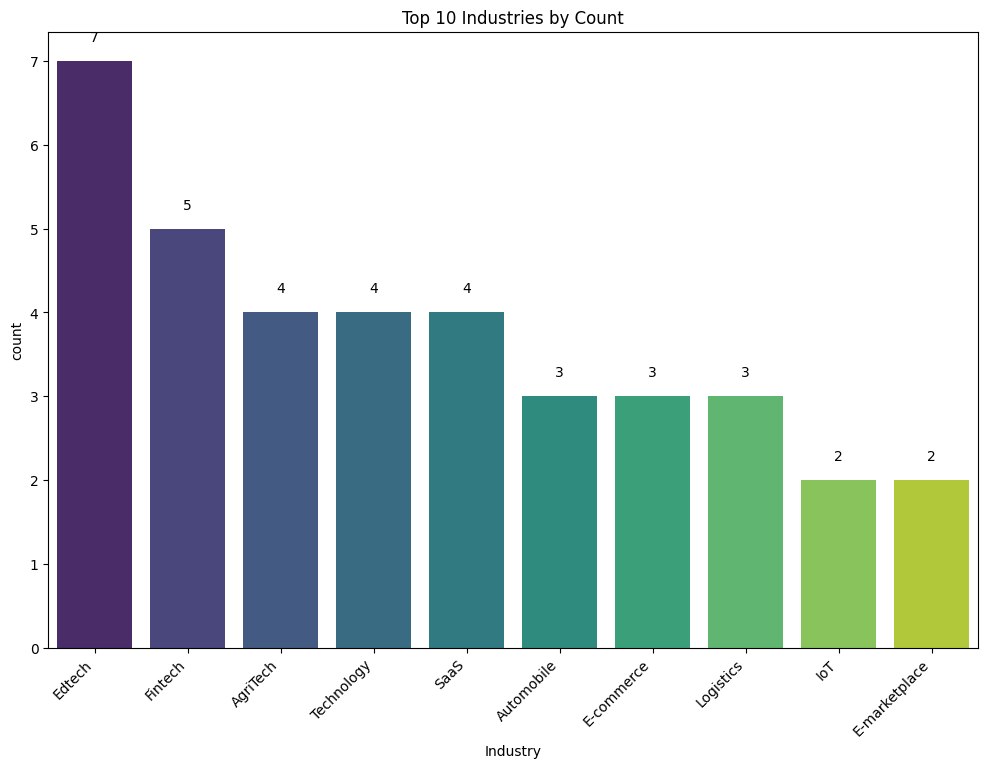

In [133]:
# 1 Distribution of Industries (Bar Chart)
plt.figure(figsize=(12, 8))
industry_distribution = df_2019['industry'].value_counts().sort_values(ascending=False).head(10)
sns.barplot(x=industry_distribution.index, y=industry_distribution.values, palette='viridis')
plt.title('Top 10 Industries by Count')
plt.xlabel('Industry')
plt.ylabel('count')
# Add data labels to the bar chart
for i, value in enumerate(industry_distribution):
    plt.text(i, value + 0.2, str(value), ha='center', va='bottom', fontsize=10)
plt.xticks(rotation=45, ha='right')
plt.show()

Edtech is the industry with the highest distribution for 2019

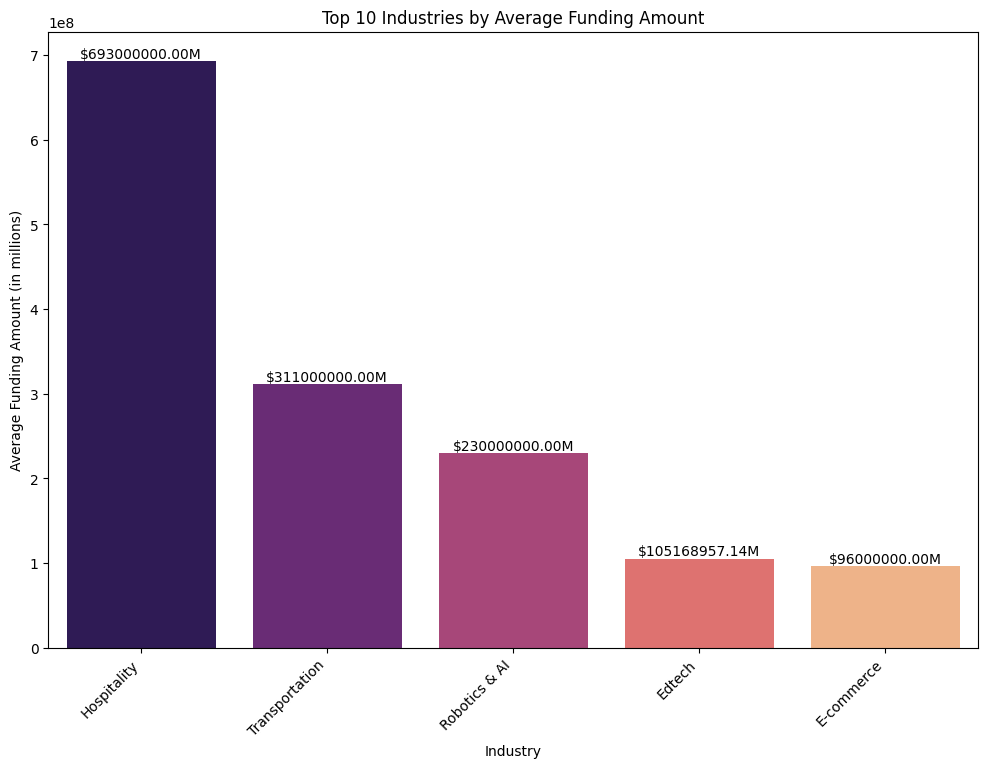

In [134]:
# 2 Average Funding Amount by Industry - Top 5 (Bar Chart)
plt.figure(figsize=(12, 8))
avg_funding_by_industry = df_2019.groupby('industry')['amount'].mean().sort_values(ascending=False).head(5)
sns.barplot(x=avg_funding_by_industry.index, y=avg_funding_by_industry.values, palette='magma')
plt.title('Top 10 Industries by Average Funding Amount')
plt.xlabel('Industry')
plt.ylabel('Average Funding Amount (in millions)')
# Add data labels to the bar chart
for i, value in enumerate(avg_funding_by_industry):
    plt.text(i, value + 0.2, f'${value:.2f}M', ha='center', va='bottom', fontsize=10)
plt.xticks(rotation=45, ha='right')
plt.show()

### Cleaning 2020 data

In [135]:
# Loading the 2020 dat frame 
df_2020.head(3)

,Company_Brand,Founded,HeadQuarter,Sector,What_it_does,Founders,Investor,Amount,Stage,column10
0,Aqgromalin,2019.0,Chennai,AgriTech,Cultivating Ideas for Profit,"Prasanna Manogaran, Bharani C L",Angel investors,200000.0,NaN,NaN
1,Krayonnz,2019.0,Bangalore,EdTech,An academy-guardian-scholar centric ecosystem ...,"Saurabh Dixit, Gurudutt Upadhyay",GSF Accelerator,100000.0,Pre-seed,NaN
2,PadCare Labs,2018.0,Pune,Hygiene management,Converting bio-hazardous waste to harmless waste,Ajinkya Dhariya,Venture Center,NaN,Pre-seed,NaN


In [136]:
# Checking 2020 information on dataset
df_2020.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1055 entries, 0 to 1054
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Company_Brand  1055 non-null   object 
 1   Founded        842 non-null    float64
 2   HeadQuarter    961 non-null    object 
 3   Sector         1042 non-null   object 
 4   What_it_does   1055 non-null   object 
 5   Founders       1043 non-null   object 
 6   Investor       1017 non-null   object 
 7   Amount         801 non-null    float64
 8   Stage          591 non-null    object 
 9   column10       2 non-null      object 
dtypes: float64(2), object(8)
memory usage: 82.6+ KB


##### Data Info summary for raw data df_2020  
There are Entries 1055 rows in the dataframe for 2020 and 10 columns  
Column Information:  
1. Company_Brand - 1055 entries and no nulls. all object entries
2. Founded - 842 entries, float d-type, with null values
3. HeadQuarter - 961 entries, object d-type, with null values
4. Sector - 1042 entries, object d-type, with null values
5. What_it_does - 1055 entries and no nulls. all object entries
6. Founders - 1043 entries, object d-type, with null values
7. Investor - 1017 entries, object d-type, with null values
8. Amount - 807 entries, float d-type, with null values
9. Stage - 591 entries, object d-type, with null values
10. column10 - 2 entries, object d-type, with null values - To be dropped since it has no valuable insights

In [137]:
# Cleaning the df_2020 data set
# First converting the column names for readability and consistency with the 2018 and 2019 data
# Dropping the column 10 since its unsusable for any meaningful insights
# Renaming the 2019 data set columns and putting them in lowercase
column_names_2020 = {'Company_Brand': 'company_name', 'Founded': 'founded', 'Sector': 'industry', 'Stage' : 'series',
                    'Amount': 'amount', 'HeadQuarter': 'city', 'What_it_does': 'about', 'Founders':'founders',
                    'Investor':'investor'}
df_2020 = df_2020.rename(columns=column_names_2020)
# Drop 'column_10', 
df_2020.drop(['column10'], axis=1, inplace=True)
df_2020.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1055 entries, 0 to 1054
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   company_name  1055 non-null   object 
 1   founded       842 non-null    float64
 2   city          961 non-null    object 
 3   industry      1042 non-null   object 
 4   about         1055 non-null   object 
 5   founders      1043 non-null   object 
 6   investor      1017 non-null   object 
 7   amount        801 non-null    float64
 8   series        591 non-null    object 
dtypes: float64(2), object(7)
memory usage: 74.3+ KB


In [138]:
# Checking for duplicates in the 2020 data
print(f'The duplicated rows in 2020 dataframe is {df_2020.duplicated().sum()}')

The duplicated rows in 2020 dataframe is 3


In [139]:
# droping the duplicates
df_2020.drop_duplicates(keep='first', inplace=True)
df_2020.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1052 entries, 0 to 1054
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   company_name  1052 non-null   object 
 1   founded       839 non-null    float64
 2   city          958 non-null    object 
 3   industry      1039 non-null   object 
 4   about         1052 non-null   object 
 5   founders      1040 non-null   object 
 6   investor      1014 non-null   object 
 7   amount        799 non-null    float64
 8   series        590 non-null    object 
dtypes: float64(2), object(7)
memory usage: 82.2+ KB


In [140]:
# Checking the object columns company name, city, industry, about, founders, investor, series for the unique values
columns_2020 = ['company_name', 'city', 'industry', 'about', 'founders', 'investor', 'series']
unique_values_df = df_2020[columns_2020].apply(lambda x: x.nunique())
# Display the DataFrame with unique values
unique_values_df

company_name    905
city             77
industry        302
about           990
founders        927
investor        848
series           42
dtype: int64

Observation  
These unique values provide insights into the diversity and variety present in the dataset across different attributes such as company names, locations, industries, founders, investors, and series categories.
Company Name: There are 905 unique company names in the 2020 dataset.  
City: The 2020 dataset includes information from 77 different cities.  
Industry: There are 302 unique industries represented in the 2020 dataset.  
About: The 'about' column contains 990 unique descriptions about the companies activities.  
Founders: The 2020 dataset lists information about 927 unique founders.  
Investor: There are records for 848 unique investors in the 2020 dataset.
Series: The 'series' column consists of 42 unique series categories for when the funding round occurred.

In [141]:
# Cleaning the Founded column because its a float and should be time series data
# Converting the founded column to datetime
df_2020['founded'] = pd.to_datetime(df_2020['founded'], format='%Y', errors='coerce')

In [142]:
# Cleaning the amount column
# create a variable for 'amount' column to check
amount_column = df_2020['amount']
# Step 1 Check for non-numeric values
non_numeric_values = amount_column[~amount_column.astype(str).str.isnumeric()]
# Step 2 Check for unique non-numeric values
unique_non_numeric_values = non_numeric_values.unique()
# Display the unique non-numeric values
print("Unique Non-Numeric Values in 'amount' column:")
unique_non_numeric_values

Unique Non-Numeric Values in 'amount' column:


array([2.0000000e+05, 1.0000000e+05,           nan, 4.0000000e+05,
       3.4000000e+05, 6.0000000e+05, 4.5000000e+07, 1.0000000e+06,
       2.0000000e+06, 1.2000000e+06, 6.6000000e+08, 1.2000000e+05,
       7.5000000e+06, 5.0000000e+06, 5.0000000e+05, 3.0000000e+06,
       1.0000000e+07, 1.4500000e+08, 1.0000000e+08, 2.1000000e+07,
       4.0000000e+06, 2.0000000e+07, 5.6000000e+05, 2.7500000e+05,
       4.5000000e+06, 1.5000000e+07, 3.9000000e+08, 7.0000000e+06,
       5.1000000e+06, 7.0000000e+08, 2.3000000e+06, 7.0000000e+05,
       1.9000000e+07, 9.0000000e+06, 4.0000000e+07, 7.5000000e+05,
       1.5000000e+06, 7.8000000e+06, 5.0000000e+07, 8.0000000e+07,
       3.0000000e+07, 1.7000000e+06, 2.5000000e+06, 4.0000000e+04,
       3.3000000e+07, 3.5000000e+07, 3.0000000e+05, 2.5000000e+07,
       3.5000000e+06, 2.0000000e+08, 6.0000000e+06, 1.3000000e+06,
       4.1000000e+06, 5.7500000e+05, 8.0000000e+05, 2.8000000e+07,
       1.8000000e+07, 3.2000000e+06, 9.0000000e+05, 2.5000000e

Observation  
It appears all the entries in the amount column  are float with no outliers.  
The column will remain as is

In [143]:
# Adding data year column to the 2020 dataset
df_2020['data_year'] = pd.to_datetime('2020', format='%Y')
# Display the updated DataFrame info
df_2020.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1052 entries, 0 to 1054
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   company_name  1052 non-null   object        
 1   founded       839 non-null    datetime64[ns]
 2   city          958 non-null    object        
 3   industry      1039 non-null   object        
 4   about         1052 non-null   object        
 5   founders      1040 non-null   object        
 6   investor      1014 non-null   object        
 7   amount        799 non-null    float64       
 8   series        590 non-null    object        
 9   data_year     1052 non-null   datetime64[ns]
dtypes: datetime64[ns](2), float64(1), object(7)
memory usage: 90.4+ KB


#### Performing Brief EDA on 2020 clean data

In [144]:
# A brief description of the data frame
df_2020.describe(include='all')

,company_name,founded,city,industry,about,founders,investor,amount,series,data_year
count,1052,839,958,1039,1052,1040,1014,7.990000e+02,590,1052
unique,905,NaN,77,302,990,927,848,NaN,42,NaN
top,Zomato,NaN,Bangalore,Fintech,Provides online learning classes,Falguni Nayar,Venture Catalysts,NaN,Series A,NaN
freq,6,NaN,316,80,4,5,20,NaN,96,NaN
mean,NaN,2015-05-17 08:22:53.063170560,NaN,NaN,NaN,NaN,NaN,1.126994e+08,NaN,2020-01-01 00:00:00
min,NaN,1973-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,1.270000e+04,NaN,2020-01-01 00:00:00
25%,NaN,2014-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,1.000000e+06,NaN,2020-01-01 00:00:00
50%,NaN,2016-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,3.000000e+06,NaN,2020-01-01 00:00:00
75%,NaN,2018-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,1.100000e+07,NaN,2020-01-01 00:00:00
max,NaN,2020-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,7.000000e+10,NaN,2020-01-01 00:00:00


#### Data Summary (2020)
The Total Records are 1052  
1. Founders and Cities: the unique founders are 905 while the unique cities are 839 with the most common city being Bangalore (316 occurrences)
2. Industries: there are 77 unique industries with the most common industry being Fintech (80 occurrences)
3. Funding Rounds: there was a total of 590 funding rounds with Series A (96 occurrences) being the most common series: 
4. Funding Amount:  
- the Mean funding amount was $112,699,400  
- the Minimum funding amount was $12,700  
- the Maximum funding amount was $70,000,000,000  
- the Funding amount standard deviation: $2,479,695,000
5. Startup Founded Dates: the oldest startup was founded in 1973, while the latestest startup was founded in 2020
6. About Startups: the Top startup was Zomato (6 occurrences) which Provides online learning classes
7. Investors: there was 848 Unique investors with Venture Catalysts (20 occurrences)  
being the investor that had the highest frequency:
